<a href="https://colab.research.google.com/github/AndresRivasGtz/Examen2Micro/blob/main/Parcial2/sadasd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar el modelo de interes
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [2]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/EntrenamientoIA/train"
test_dir = "/content/drive/MyDrive/EntrenamientoIA/test"

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 100 images belonging to 10 classes.
Testing images:
Found 100 images belonging to 10 classes.


In [3]:
IMAGE_SIZE+(3,)

(224, 224, 3)

In [4]:
#model = Sequential()
#model.add(Conv2D( 128, (3, 3), strides=(1,1), activation='relu', input_shape=(224,224,3) ))
#model.add(Conv2D( 64, (4, 4), strides=(1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(64, (5, 5), strides=(2,2), activation='relu'))
#model.add(Conv2D(32, (4, 4), strides=(2,2), activation='relu'))
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Dropout(0.5))
#model.add(Flatten())
#model.add(Dense(110, activation='relu'))
#model.add(Dense(120, activation='relu'))
#model.add(Dense(100, activation='softmax'))
#model.add(Dense(10, activation='softmax'))

In [5]:
model = Sequential()
model.add(Conv2D( 300, (4, 4), strides=(4,4), activation='relu', input_shape=(224,224,3) ))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.1))
model.add(Conv2D( 200, (3, 3), strides=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 300)       14700     
                                                                 
 dropout (Dropout)           (None, 56, 56, 300)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 300)      0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 55, 55, 300)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 200)       540200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 200)      0         
 2D)                                                    

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics='accuracy')

In [8]:
history=model.fit(train_data, validation_data=test_data, epochs=300, batch_size=300)

Epoch 1/300
4/4 [==============================] - 141s 42s/step - loss: 2.5467 - accuracy: 0.1100 - val_loss: 2.4272 - val_accuracy: 0.1000
Epoch 2/300
4/4 [==============================] - 5s 2s/step - loss: 2.4598 - accuracy: 0.1000 - val_loss: 2.3481 - val_accuracy: 0.1000
Epoch 3/300
4/4 [==============================] - 5s 1s/step - loss: 2.3446 - accuracy: 0.1200 - val_loss: 2.3207 - val_accuracy: 0.1000
Epoch 4/300
4/4 [==============================] - 5s 1s/step - loss: 2.3505 - accuracy: 0.1200 - val_loss: 2.3273 - val_accuracy: 0.1000
Epoch 5/300
4/4 [==============================] - 6s 2s/step - loss: 2.3890 - accuracy: 0.0900 - val_loss: 2.3164 - val_accuracy: 0.1100
Epoch 6/300
4/4 [==============================] - 4s 1s/step - loss: 2.3189 - accuracy: 0.1200 - val_loss: 2.2552 - val_accuracy: 0.1700
Epoch 7/300
4/4 [==============================] - 4s 1s/step - loss: 2.3320 - accuracy: 0.0900 - val_loss: 2.2364 - val_accuracy: 0.1600
Epoch 8/300
4/4 [==============

<function matplotlib.pyplot.show(close=None, block=None)>

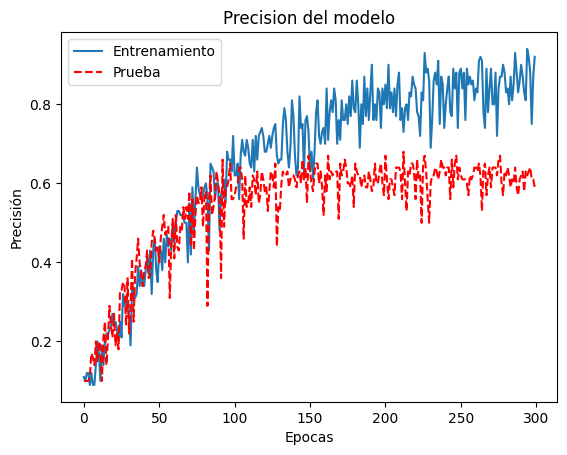

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], 'r--')
plt.title('Precision del modelo')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

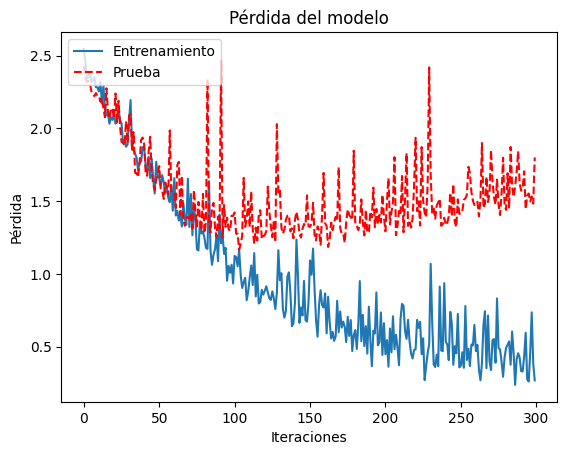

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'r--')
plt.title('Pérdida del modelo')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show